In [85]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.metrics import accuracy_score as acc_score
import scipy.interpolate

In [2]:
# read file function
def read_data(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        data = []
        for line in lines:
            x1, x2, y = map(float, line.strip().split())
            data.append([x1, x2, y])
        return np.array(data)

# Q2

In [3]:
# entropy
def entropy(node):
    _, count = np.unique(node, return_counts=True)
    p_category = count / len(node)
    # avoid log2 to be negative infinity
    entro = -np.sum(p_category * np.log2(p_category))
    return entro

In [4]:
# gain ratio
def gain_ratio(node, node_1, node_2):
    # calculate gain
    H_parent = entropy(node)
    H_1 = entropy(node_1)
    H_2 = entropy(node_2)
    p_1 = len(node_1) / len(node)
    p_2 = len(node_2) / len(node)
    InfoGain = H_parent - p_1 * H_1 - p_2 * H_2

    # Split information
    InfoSplit = -(p_1 * np.log2(p_1) + p_2 * np.log2(p_2))

    # Gain ratio
    GainRatio = InfoGain / InfoSplit

    return GainRatio

In [5]:
# find the split for one step
def best_split(X, label):
    best_gain_ratio = 0
    the_best_split = (None, None)
    for j in range(X.shape[1]):
        thresholds = np.unique(X[:, j])
        for c in thresholds:
            label_id = X[:, j] >= c
            # get data for the splits
            label_1 = label[label_id]
            label_2 = label[~label_id]
            # if empty then just keep the best_gain_ratio
            if len(label_1) > 0 and len(label_2) > 0:
                # if not empty, then calculate the gain_ratio of this split
                GainRatio = gain_ratio(label, label_1, label_2)
                # if the gain_ratio is not 0, replace the best_gain_ratio. The bigger, the better.
                if GainRatio > best_gain_ratio:
                    best_gain_ratio = GainRatio
                    # record the best split
                    the_best_split = (j, c)
    return the_best_split

In [6]:
# main function to build a tree
def build_tree(X, y):
    if X.shape[0]== 0:
        # no data gives label 1
        return TreeNode(label=1)  
    if len(set(y)) == 1:
        # only one class gives one label
        return TreeNode(label=y[0])
    # Find the best splt
    split, threshold = best_split(X, y)
    # if no split is found, just give 1
    if split is None:
        return TreeNode(label=1)
    label_id = X[:, split] >= threshold
    X_1, y_1 = X[label_id], y[label_id]
    X_2, y_2 = X[~label_id], y[~label_id]
    # iteratively returns all the branches
    subtree_1 = build_tree(X_1, y_1)
    subtree_2 = build_tree(X_2, y_2)
    return TreeNode(split=split, threshold=threshold, left=subtree_1, right=subtree_2)

In [7]:
# define a simple tree class
class TreeNode:
    def __init__(self, split=None, threshold=None, left=None, right=None, label=None):
        self.split = split
        self.threshold = threshold
        self.left = left
        self.right = right
        self.label = label
    def __str__(self):
        if self.label is not None:
            # If the node is a leaf node, display the label
            return f"Leaf Node: Label={self.label}"
        else:
            # If the node is not a leaf node, display split and threshold
            return f"Node: Split=Feature {self.split}, Threshold={self.threshold}"
        
def print_tree(node, depth=0):
    if node is not None:
        # Print the current node
        indent = "  " * depth
        print(f"{depth} {indent}{node}")

        # Recursively print left and right subtrees
        print_tree(node.left, depth + 1)
        print_tree(node.right, depth + 1)

## 3 Gain ratio exercise

In [8]:
def q_2_3(X, y):
    res = []
    for j in range(X.shape[1]):
        thresholds = np.unique(X[:, j])
        for c in thresholds:
            label_id = X[:, j] >= c
            # get data for the splits
            label_1 = y[label_id]
            label_2 = y[~label_id]
            # calculate gain
            H_parent = entropy(y)
            H_1 = entropy(label_1)
            H_2 = entropy(label_2)
            p_1 = len(label_1) / len(y)
            p_2 = len(label_2) / len(y)
            InfoGain = H_parent - p_1 * H_1 - p_2 * H_2
            GainRatio = gain_ratio(y, label_1, label_2)
            res.append((j, c, InfoGain, GainRatio))
    return res

In [9]:
data_2_3 = read_data("data/Druns.txt")
X = data_2_3[:, 0:2]
label = data_2_3[:, 2]
res_2_3 = q_2_3(X, label)
for a,b,c,d in res_2_3:
    print(f"Candidate cut: x{a+1} >= {b}, gain ratio: {d}, information gain: {c}")

Candidate cut: x1 >= 0.0, gain ratio: nan, information gain: 0.0
Candidate cut: x1 >= 0.1, gain ratio: 0.10051807676021828, information gain: 0.04417739186726133
Candidate cut: x2 >= -2.0, gain ratio: nan, information gain: 0.0
Candidate cut: x2 >= -1.0, gain ratio: 0.10051807676021828, information gain: 0.04417739186726133
Candidate cut: x2 >= 0.0, gain ratio: 0.0559537596312636, information gain: 0.038274522206292516
Candidate cut: x2 >= 1.0, gain ratio: 0.00578004220515232, information gain: 0.004886164091842726
Candidate cut: x2 >= 2.0, gain ratio: 0.0011443495172767494, information gain: 0.0010821659130775263
Candidate cut: x2 >= 3.0, gain ratio: 0.016411136842102134, information gain: 0.016313165825732057
Candidate cut: x2 >= 4.0, gain ratio: 0.04974906418177849, information gain: 0.04945207278939395
Candidate cut: x2 >= 5.0, gain ratio: 0.11124029586339795, information gain: 0.10519553207004623
Candidate cut: x2 >= 6.0, gain ratio: 0.23609960614360798, information gain: 0.199587

C:\Users\10946\AppData\Local\Temp\ipykernel_23112\1127420629.py:12: RuntimeWarning: divide by zero encountered in log2
  InfoSplit = -(p_1 * np.log2(p_1) + p_2 * np.log2(p_2))
C:\Users\10946\AppData\Local\Temp\ipykernel_23112\1127420629.py:12: RuntimeWarning: invalid value encountered in scalar multiply
  InfoSplit = -(p_1 * np.log2(p_1) + p_2 * np.log2(p_2))


## 4 Interpretability

In [10]:
data_2_4 = read_data('data/D3leaves.txt')
X = data_2_4[:, 0:2]
label = data_2_4[:, -1]
res_2_4 = build_tree(X, label)

In [11]:
print_tree(res_2_4)

0 Node: Split=Feature 0, Threshold=10.0
1   Leaf Node: Label=1.0
1   Node: Split=Feature 1, Threshold=3.0
2     Leaf Node: Label=1.0
2     Leaf Node: Label=0.0


## 5 Or is it?

In [12]:
data_D1 = read_data('data/D1.txt')
X_D1 = data_D1[:, 0:2]
label_D1 = data_D1[:, 2]
res_2_5_1 = build_tree(X_D1, label_D1)

In [13]:
print_tree(res_2_5_1)

0 Node: Split=Feature 1, Threshold=0.201829
1   Leaf Node: Label=1.0
1   Leaf Node: Label=0.0


In [14]:
data_D2 = read_data('data/D2.txt')
X_D2 = data_D2[:, 0:2]
label_D2 = data_D2[:, 2]
res_2_5_2 = build_tree(X_D2, label_D2)

In [15]:
print_tree(res_2_5_2)

0 Node: Split=Feature 0, Threshold=0.533076
1   Node: Split=Feature 1, Threshold=0.228007
2     Node: Split=Feature 1, Threshold=0.424906
3       Leaf Node: Label=1.0
3       Node: Split=Feature 0, Threshold=0.708127
4         Leaf Node: Label=1.0
4         Node: Split=Feature 1, Threshold=0.32625
5           Node: Split=Feature 0, Threshold=0.595471
6             Node: Split=Feature 0, Threshold=0.646007
7               Leaf Node: Label=1.0
7               Node: Split=Feature 1, Threshold=0.403494
8                 Leaf Node: Label=1.0
8                 Leaf Node: Label=0.0
6             Leaf Node: Label=0.0
5           Leaf Node: Label=0.0
2     Node: Split=Feature 0, Threshold=0.887224
3       Node: Split=Feature 1, Threshold=0.037708
4         Node: Split=Feature 1, Threshold=0.082895
5           Leaf Node: Label=1.0
5           Node: Split=Feature 0, Threshold=0.960783
6             Leaf Node: Label=1.0
6             Leaf Node: Label=0.0
4         Leaf Node: Label=0.0
3       Node

## 6 Visualization

In [16]:
# plot data
def plot_data(X, label):
    plt.scatter(X[label == 0, 0], X[label == 0, 1], color='orange', s=6, label='Label 0')
    plt.scatter(X[label == 1, 0], X[label == 1, 1], color='green', s=6, label='Label 1')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()

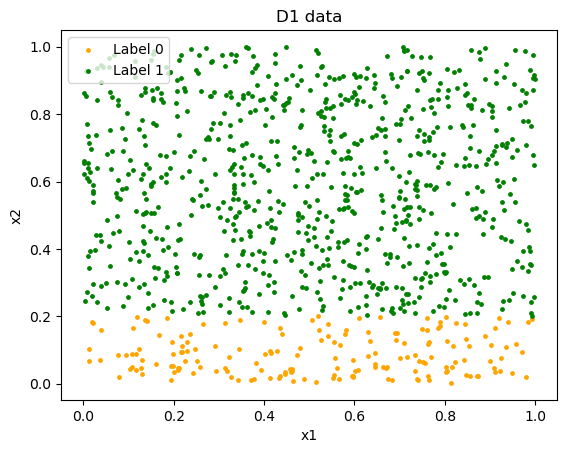

In [17]:
# D1 data
plot_data(X_D1, label_D1)
plt.title('D1 data')
plt.show()

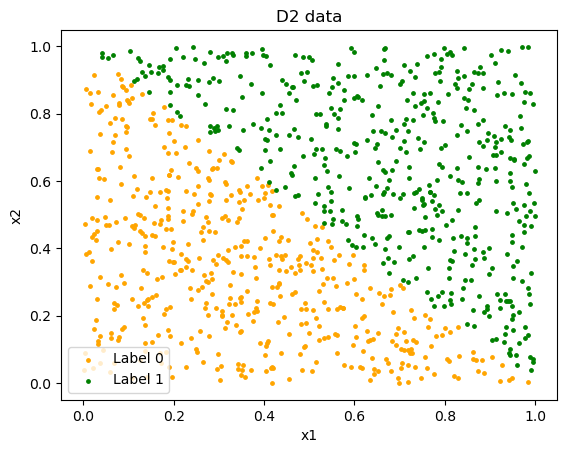

In [18]:
# D2 data
plot_data(X_D2, label_D2)
plt.title('D2 data')
plt.show()

In [35]:
# use the transparent points to plot the area
def classify_tree(node, sample):
    if node.label is not None:
        return node.label
    if node.split == 0:
        if sample[0] < node.threshold:
            return classify_tree(node.right, sample)
        else:
            return classify_tree(node.left, sample)
    elif node.split == 1:
        if sample[1] < node.threshold:
            return classify_tree(node.right, sample)
        else:
            return classify_tree(node.left, sample)

def plot_decision_boundary(tree, x_min, x_max, y_min, y_max, num_points=100, al=0.3):
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, num_points), np.linspace(y_min, y_max, num_points))
    Z = np.zeros_like(xx)

    for i in range(num_points):
        for j in range(num_points):
            sample = np.array([xx[i, j], yy[i, j]])
            Z[i, j] = 1- classify_tree(tree, sample)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha = al)

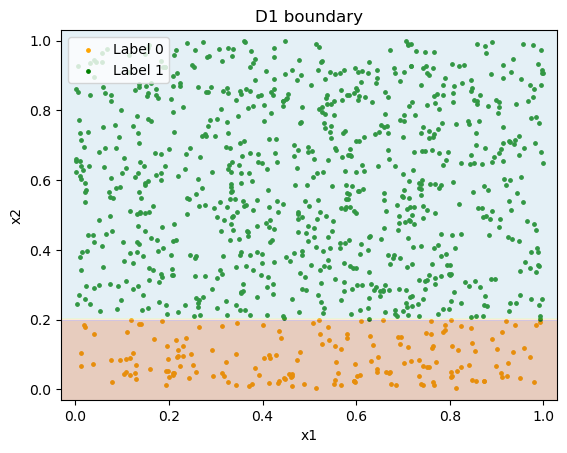

In [20]:
# Define the range for plotting
x_min, x_max = -0.03, 1.03
y_min, y_max = -0.03, 1.03

plot_data(X_D1, label_D1)

# Plot the decision boundary based on the tree
plot_decision_boundary(res_2_5_1, x_min, x_max, y_min, y_max)
plt.title('D1 boundary')

plt.show()

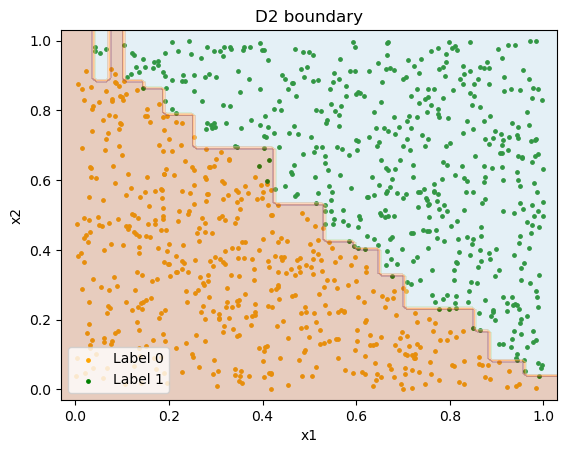

In [21]:
# Define the range for plotting
x_min, x_max = -0.03, 1.03
y_min, y_max = -0.03, 1.03

plot_data(X_D2, label_D2)

# Plot the decision boundary based on the tree
plot_decision_boundary(res_2_5_2, x_min, x_max, y_min, y_max)
plt.title('D2 boundary')

plt.show()

## 7 Learning curve

In [22]:
def err_rate(tree, X, label):
    num_err = 0
    for i in range(len(label)):
        tree_label = classify_tree(tree, X[i, :]) 
        if tree_label != label[i]:
            num_err += 1
    error_rate = num_err/len(label)
    return error_rate 

def count_nodes(node):
    if node is None:
        return 0
    return 1 + count_nodes(node.left) + count_nodes(node.right)

Number of training data: 32, number of nodes: 9, err_n: 0.14767699115044247
Number of training data: 128, number of nodes: 23, err_n: 0.10232300884955753
Number of training data: 512, number of nodes: 49, err_n: 0.055862831858407076
Number of training data: 2048, number of nodes: 127, err_n: 0.03373893805309734
Number of training data: 8192, number of nodes: 259, err_n: 0.019358407079646017


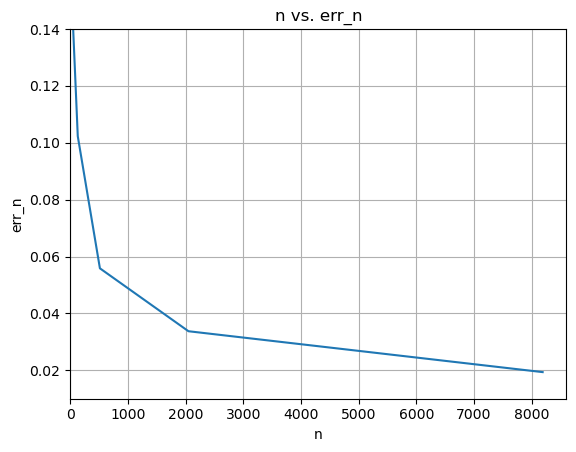

In [37]:
random.seed(2)
data_Dbig = read_data('data/Dbig.txt')
X_Dbig = data_D2[:, 0:2]
label_Dbig = data_D2[:, 2]

premu_id = np.random.permutation(10000)

train = data_Dbig[premu_id[:8192]]
X_train = train[:, 0:2]
label_train = train[:, 2]
    
test = data_Dbig[premu_id[8192:]]
X_test = test[:, 0:2]
label_test = test[:, 2]
    
num_train = [32, 128, 512, 2048, 8192]
error_rate_list = []

# Define the range for plotting
x_min, x_max = -2, 2
y_min, y_max = -2, 2 

for num in num_train:
    tree = build_tree(X_train[:num], label_train[:num])
    num_node = count_nodes(tree)
    error_rate = err_rate(tree, X_test, label_test)
    error_rate_list.append(error_rate)
    print(f"Number of training data: {num}, number of nodes: {num_node}, err_n: {error_rate}")
    # Plot the decision boundary based on the tree
    plot_decision_boundary(tree, x_min, x_max, y_min, y_max, num_points=400, al = 1)
    plt.title(f'D_{num} boundary')
    plt.savefig(f'{num}.png')

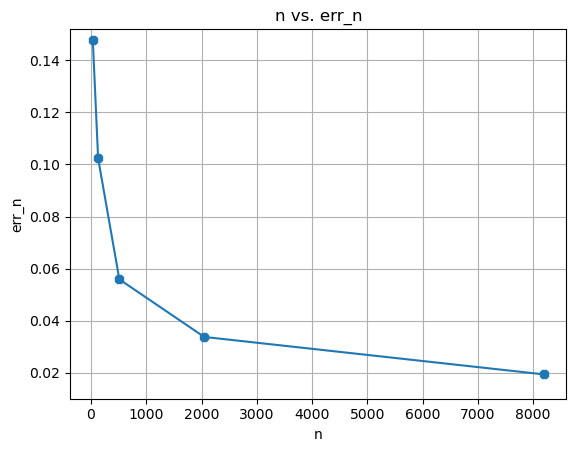

In [40]:
plt.plot(num_train, error_rate_list, marker='8')
plt.xlabel('n')
plt.ylabel('err_n')
plt.ylim(0.01,0.152)
plt.title('n vs. err_n')
plt.grid(True)
plt.show()

# Q3

In [44]:
error_sklearn = []
for num in num_train:
    tree_classifier = DTC()
    tree_classifier.fit(X_train[:num], label_train[:num])
    label_pred = tree_classifier.predict(X_test)
    error_rate = 1 - acc_score(label_test, label_pred)
    error_sklearn.append(error_rate)
    print(f"n: {num}, number of nodes: {tree_classifier.tree_.node_count}, err_n: {error_rate}")

n: 32, number of nodes: 9, err_n: 0.09347345132743368
n: 128, number of nodes: 23, err_n: 0.0752212389380531
n: 512, number of nodes: 53, err_n: 0.05696902654867253
n: 2048, number of nodes: 117, err_n: 0.029314159292035402
n: 8192, number of nodes: 235, err_n: 0.011061946902654829


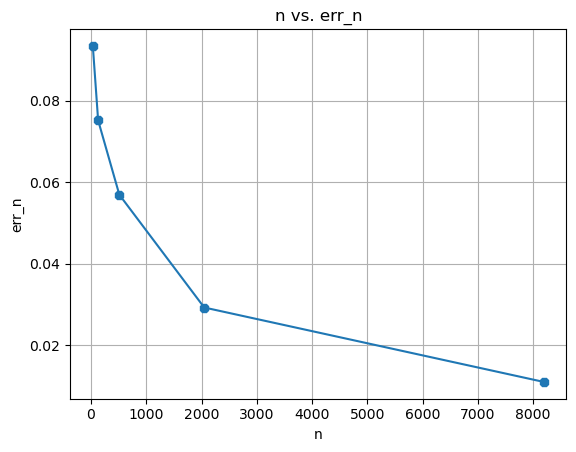

In [46]:
plt.plot(num_train, error_sklearn, marker='8')
plt.xlabel('n')
plt.ylabel('err_n')
plt.title('n vs. err_n')
plt.grid(True)
plt.show()

# Q4

In [107]:
np.random.seed(1)
a, b = 0, 2 * np.pi 
n = 100 
x_train = np.sort(np.random.uniform(a, b, n))
y_train = np.sin(x_train)

f = scipy.interpolate.lagrange(x_train, y_train)

x_test = np.sort(np.random.uniform(a, b, n))
y_test = np.sin(x_test)

train_error = np.log(np.mean((f(x_train) - y_train) ** 2))
test_error = np.log(np.mean((f(x_test) - y_test) ** 2))

print(f"Train log MSE: {train_error}")
print(f"Test log MSE: {test_error}")

Train log MSE: 340.13466501695655
Test log MSE: 341.46310348052214


In [108]:
np.random.seed(6)
sigma = [0.1, 1.0, 5, 10, 50, 100]

for sd in sigma:
    x_train_n = x_train + np.random.normal(0, sd, n)
    y_train_n = np.sin(x_train_n)

    f_n = scipy.interpolate.lagrange(x_train_n, y_train_n)

    train_error_n = np.log(np.mean((f_n(x_train_n) - y_train_n) ** 2))
    test_error_n = np.log(np.mean((f_n(x_test) - y_test) ** 2))

    print(f"Standard Deviation: {sd}")
    print(f"Train log MSE with Noise: {train_error_n}")
    print(f"Test log MSE with Noise: {test_error_n}")

Standard Deviation: 0.1
Train log MSE with Noise: 327.6870815532148
Test log MSE with Noise: 328.4067947842452
Standard Deviation: 1.0
Train log MSE with Noise: 349.94745026447987
Test log MSE with Noise: 320.5907706735805
Standard Deviation: 5
Train log MSE with Noise: 303.29414149186016
Test log MSE with Noise: 148.9951665940137
Standard Deviation: 10
Train log MSE with Noise: 280.4369956935111
Test log MSE with Noise: 61.353817408135725
Standard Deviation: 50
Train log MSE with Noise: 221.36744888416032
Test log MSE with Noise: -49.2155854752106
Standard Deviation: 100
Train log MSE with Noise: 301.6470004685427
Test log MSE with Noise: -38.77291586689157


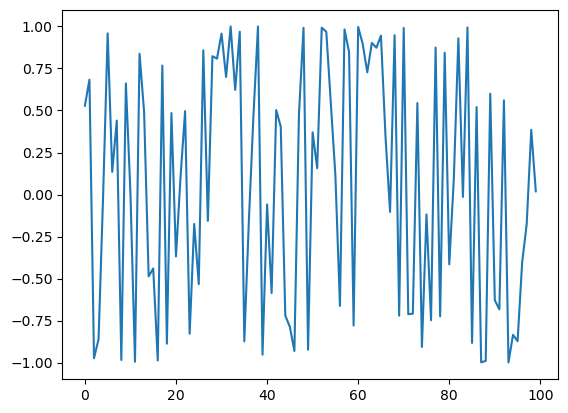

In [109]:
    x_train_n = x_train + np.random.normal(0, 5, n)
    y_train_n = np.sin(x_train_n)

    f_n = scipy.interpolate.lagrange(x_train_n, y_train_n)
    plt.plot(y_train_n)